# Notebook for stencil validation and timing

Jan, Nina Horat & Laura Endres

In [ ]:
#Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

In [3]:
#Name Lists
stencil_name_list = [
        "test",
        "laplacian1d", 
        "laplacian2d",
        "laplacian3d",
        "FMA",
       "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
        "test_gt4py",
    ]

backend_list = ["numpy", 
                "numba_vector_function", 
                "numba_vector_decorator", 
                "numba_loop", 
                "numba_stencil", 
                "gt4py"]

gt4py_backend_list = [
        "numpy", 
        "gtx86", 
        "gtmc", 
        "gtcuda"]


## Validation
### Create testfields
We create one testfield per stencil_name (option --create_field = True). After creation the fields are saved in the folder testfields and can be accessed by the option --field_name.

In [3]:
for x in stencil_name_list:
    
    bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend numpy --create_field True --field_name {x}"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    output, error = process.communicate()
    
    print(output.decode("utf-8"))

New output field test saved.

New output field laplacian1d saved.

New output field laplacian2d saved.

New output field laplacian3d saved.

New output field FMA saved.

New output field lapoflap1d saved.

New output field lapoflap2d saved.

New output field lapoflap3d saved.




In [ ]:
for x in stencil_name_list:
    print(x,':')
    for y in backend_list:
        
        if y=='gt4py':
            if x=='test':
                print('There is no test stencil in gt4py.')
            else:
                for z in gt4py_backend_list:
                    bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend {y} --gt4py_backend {z} --create_field False --field_name {x}"
                    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
                    output, error = process.communicate()
                    print(output.decode("utf-8"),' for ', z)
                
        else:
            bashCommand=f"python3 stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend {y} --create_field False --field_name {x}"
            process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
            output, error = process.communicate()
            print(output.decode("utf-8"))

## Timing
### Execute Stencil computation for evaluation
In this section the different stencils for the different domain sizes are calculated.


In [7]:
#this takes some time...
#Parameter 
field_size_list = [16,32]
df_name = "val_L" #Name of evaluation dataframe
num_iter = 20

#Stencil computation
for size in field_size_list:
    print(size,':')
    for x in stencil_name_list:
        print('    ',x,':')
        for y in backend_list:
            bashCommand=f"python3 stencil_main_performance.py --nx {size} --ny {size} --nz {size} --stencil_name {x} --backend {y} --num_iter {num_iter} --df_name {df_name}"
            process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
            print(y,' calculated.')
            #output, error = process.communicate()
            #print(output.decode("utf-8"))

16 :
     test :
numpy  calculated.
numba_vector_function  calculated.
numba_vector_decorator  calculated.
numba_loop  calculated.
numba_stencil  calculated.
gt4py  calculated.
     laplacian1d :
numpy  calculated.
numba_vector_function  calculated.
numba_vector_decorator  calculated.
numba_loop  calculated.
numba_stencil  calculated.
gt4py  calculated.
     laplacian2d :
numpy  calculated.
numba_vector_function  calculated.
numba_vector_decorator  calculated.
numba_loop  calculated.
numba_stencil  calculated.
gt4py  calculated.
     laplacian3d :
numpy  calculated.
numba_vector_function  calculated.
numba_vector_decorator  calculated.
numba_loop  calculated.
numba_stencil  calculated.
gt4py  calculated.
     FMA :
numpy  calculated.
numba_vector_function  calculated.
numba_vector_decorator  calculated.
numba_loop  calculated.
numba_stencil  calculated.
gt4py  calculated.
     lapoflap1d :
numpy  calculated.
numba_vector_function  calculated.
numba_vector_decorator  calculated.
numba_l

### Read out the dataframe and plot results
The program saves the evaluation data into a pandas dataframe (Name is defined with the option --df_name). Subsequently the df can be accessed for further processing within a jupyter notebook.

In [8]:
df_name = "val_L" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

stencil_name                 backend numba_parallel gt4py_backend  nx  ny  \
104  laplacian1d              numba_loop          False         numpy  16  16   
105          FMA  numba_vector_decorator          False         numpy  16  16   
106   lapoflap2d           numba_stencil          False         numpy  16  16   
107  laplacian1d           numba_stencil          False         numpy  32  32   
108   lapoflap1d  numba_vector_decorator          False         numpy  16  16   
109   lapoflap2d   numba_vector_function          False         numpy  16  16   
110  laplacian3d  numba_vector_decorator          False         numpy  16  16   
111  laplacian3d   numba_vector_function          False         numpy  16  16   
112   lapoflap1d   numba_vector_function          False         numpy  16  16   
113   lapoflap3d   numba_vector_function          False         numpy  32  32   

     nz num_iter  time_total   run_avg  run_stdev  run_first10  run_last10  
104  16       20    0.003162  0.000158   0.000582     0.000291    0.000026  
105  16       20    0.000998  0.000050   0.000004     0.000050    0.000050  
106  16       20    0.001112  0.000056   0.000002     0.000055    0.000056  
107  32       20    0.003237  0.000162   0.000075     0.000184    0.000139  
108  16       20    0.002819  0.000141   0.000008     0.000144    0.000139  
109  16       20    0.004679  0.000234   0.000088     0.000236    0.000233  
110  16       20    0.004280  0.000214   0.000143     0.000243    0.000203  
111  16       20    0.001910  0.000095   0.000039     0.000083    0.000097  
112  16       20    0.001901  0.000095   0.000027     0.000110    0.000082  
113  32       20    0.018288  0.000914   0.000017     0.000910    0.000919

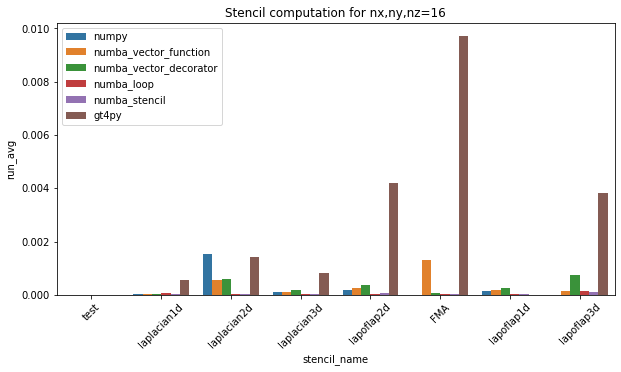

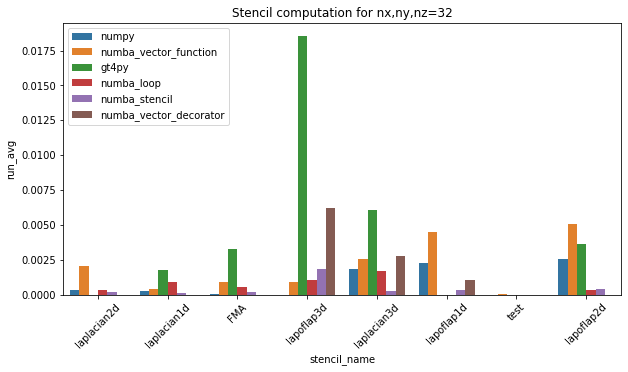

In [9]:
df_name = "val_L" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))

for size in field_size_list:
        df_plot = df.loc[df["nx"]==size]
        plt.figure(figsize=(10,5))
        chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df_plot, ci=False)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        chart.legend(loc='upper left')
        chart.set_title('Stencil computation for nx,ny,nz={}'.format(size))


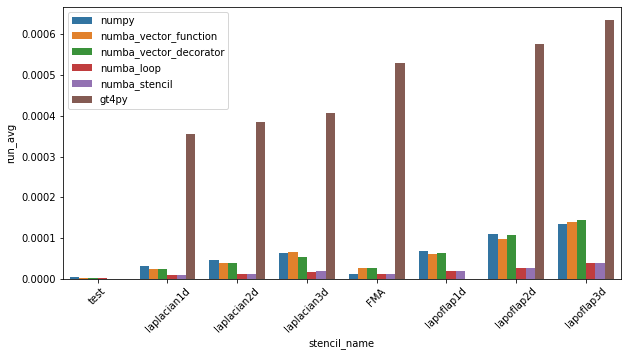

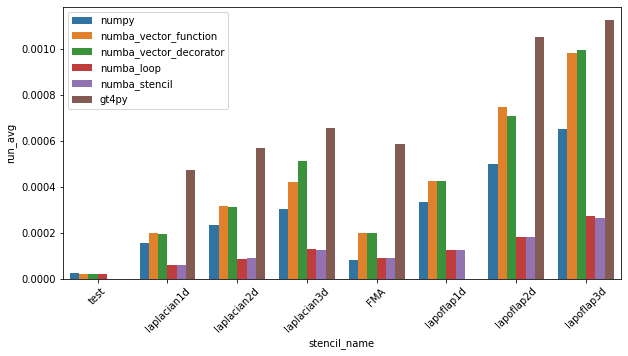

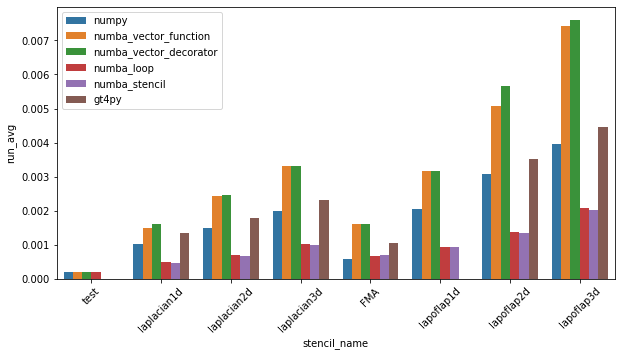

In [42]:

df_name = "val_1" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

df16=df.loc[df["nx"]==16]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df16, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')


df32=df.loc[df["nx"]==32]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df32, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

df64=df.loc[df["nx"]==64]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df64, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

(48, 5)


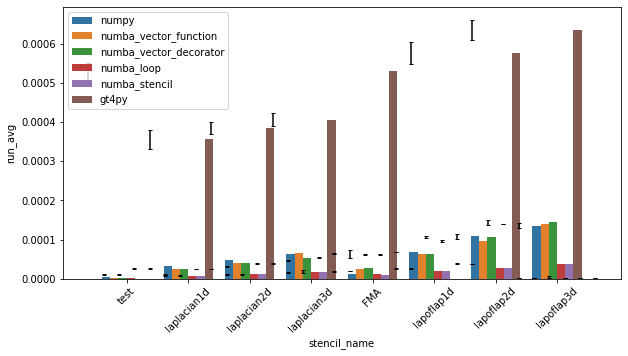

In [89]:
#############first try to add error bars. 
#the location of the bars is still wrong since the rows get ordered differently when .groupby is applied. 
#also I had to add data points for gt4py and numba_stencil where the function do not yet work.
#but this would be an option to get the error bars on top of everything.
#https://stackoverflow.com/questions/62820959/use-precalculated-error-bars-with-seaborn-and-barplot
#https://matplotlib.org/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

df_name = "val_1" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

df16=df.loc[df["nx"]==16]
plt.figure(figsize=(10,5))
chart =sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df16, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

conc2=[0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7]
width = .25
add = [-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width, -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
      ]
x = np.array(conc2)+np.array(add)
#print(x)

df16_stdev=df16.groupby(['stencil_name','backend']).mean()
df16_stdev=df16_stdev.append(df16_stdev[-4:-1])
#print(df16_stdev)
print(df16_stdev.shape)
plt.errorbar(x = x, y = df16_stdev['run_avg'],
            yerr = df16_stdev['run_stdev'],
             fmt='none', c= 'black', capsize = 2
            )
plt.show()


In [47]:
#Clear df on disk
df_name = "test"
os.remove("eval/{}_result.pkl".format(df_name))

### Evaluate Runtime
We suspect that different number of iterations will lead to different runtime developments.
This can be tested with the option --save_runtime. The df runtimedevelopment can afterwards be evaluated.

In [64]:
df_runtime = pd.read_pickle("eval/runtimedevelopment.pkl")
df_runtime.columns = ['runtime']
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


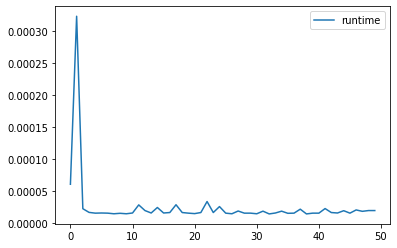

In [65]:
df_runtime.plot()